## Introduction to Python for machine learning

The Food Balance Sheet Dataset is from the Food and Agriculture Organization of the United Nations.

### Features of the dataset

Area Code : This specifies the code of the country.

Area : This column contains the country names.

Item Code : This is code of the product.

Item : This specifies the name of the products being produced.

Element Code : This is the code of element.

Element : This specifies the name of the element being measured.

Unit : This is the unit of measurement.

Y2014 : This column contains the  values of 2014.

Y2015 : This column contains the  values of 2015.

Y2016 : This column contains the  values of 2016.

Y2017 : This column contains the  values of 2017.

Y2018 : This column contains the  values of 2018.

## Questions to be Answered

(a) What is the mean and standard deviation across the whole dataset for the year 2017 to 2 decimal places?

(b) What is the total number and percentage of missing data in 2014 to 3 decimal places?

(c) What is the Total number of unique countries in the dataset?

(d) Which of these Area had the highest sum in 2017.

(e) What is the total number of the sum of Processing in 2017?

(f) Which of these Areas had the 7th lowest sum in 2017.

(g) What year has the highest sum of Stock Variation?
 
(h) What is the total Protein supply quantity in Madagascar in 2015?

(i) Which year had the least correlation with Element Code.

(j) What is the total sum of Wine produced in 2015 and 2018?

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset 
df = pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding = "latin_1")

In [3]:
#Calling out the dataset after loading it. 
df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [4]:
#preview the dataset
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [5]:
#selecting numerical dataframe.
numerical_df = df.select_dtypes(include = [int, float])

In [6]:
#.info() function is used to understand the data types, numbers of columns, number of rows and memory storage of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [7]:
#categorical data frame
categorical = df.select_dtypes(exclude = [int, float])

In [8]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     60943 non-null  object
 1   Item     60943 non-null  object
 2   Element  60943 non-null  object
 3   Unit     60943 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [9]:
#Summary Statistics of the dataset
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


#### The mean of Y2017 across the whole dataset to 2 decimal places is 140.92 and the standard deviation to 2 decimal places is 1671.86 respectively.

### Data Cleaning

In [10]:
df.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

#### The total number of missing data in 2014 to 3 decimal places is 1589.

In [11]:
df.dropna().shape

(57784, 12)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(57784, 12)

In [14]:
df.isna().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

In [15]:
#Checking if there is duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
60938    False
60939    False
60940    False
60941    False
60942    False
Length: 57784, dtype: bool

#### The dataset has no duplicate values.

## Exploratory Data Analysis

In [16]:
categorical.describe()

,Area,Item,Element,Unit
count,60943,60943,60943,60943
unique,49,119,18,5
top,Kenya,Milk - Excluding Butter,Domestic supply quantity,1000 tonnes
freq,1560,1262,5295,40933


In [17]:
area_count = df['Area'].value_counts()
print(area_count)

Kenya                          1521
Nigeria                        1438
Egypt                          1437
Senegal                        1437
Côte d'Ivoire                  1431
Uganda                         1420
Cameroon                       1415
Madagascar                     1405
Zambia                         1395
South Africa                   1391
Ethiopia                       1390
United Republic of Tanzania    1386
Mozambique                     1369
Malawi                         1363
Rwanda                         1355
Angola                         1350
Burkina Faso                   1343
Botswana                       1342
Morocco                        1338
Zimbabwe                       1337
Congo                          1336
Guinea                         1323
Mauritius                      1321
Ghana                          1311
Niger                          1308
Tunisia                        1293
Namibia                        1247
Algeria                     

In [18]:
top_8_area = area_count[:8]

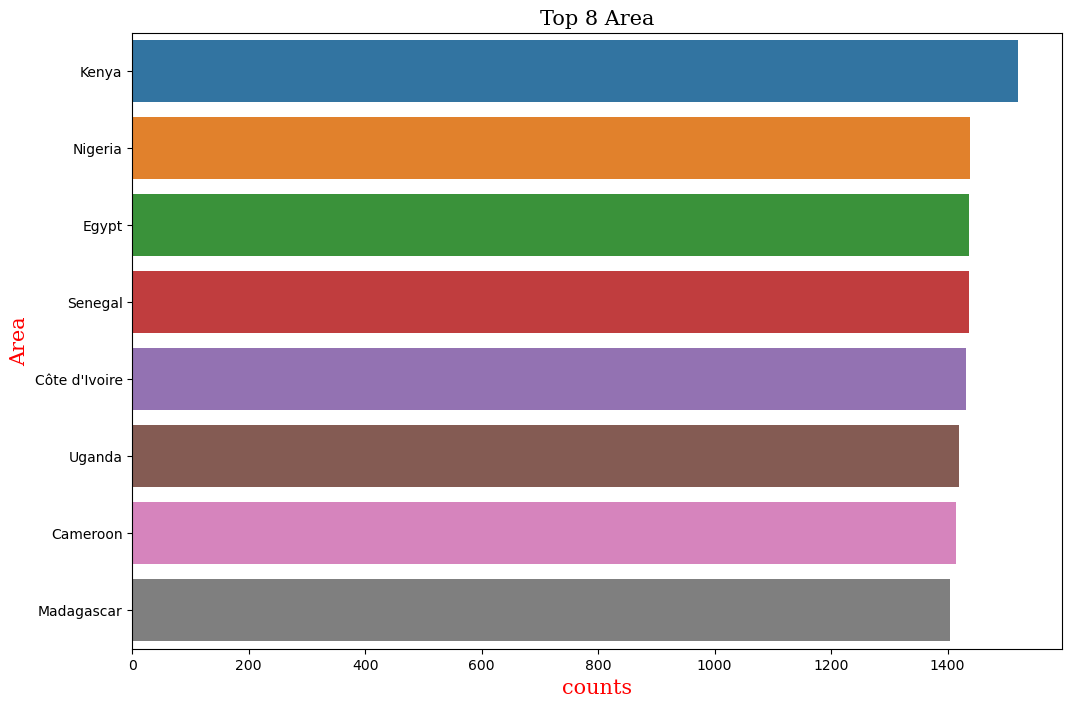

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_8_area.values, y=top_8_area.index)


font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}


plt.title('Top 8 Area', fontdict=font1)
plt.xlabel('counts', fontdict=font2)
plt.ylabel('Area', fontdict=font2)
plt.show()

In [20]:
item_count = df['Item'].value_counts()
print(item_count)

Milk - Excluding Butter     1234
Eggs                        1096
Miscellaneous                883
Cereals - Excluding Beer     708
Oilcrops                     693
                            ... 
Grand Total                  135
Animal Products              135
Vegetal Products             135
Sugar non-centrifugal        113
Population                    90
Name: Item, Length: 119, dtype: int64


In [21]:
top_10_item = item_count[:10]

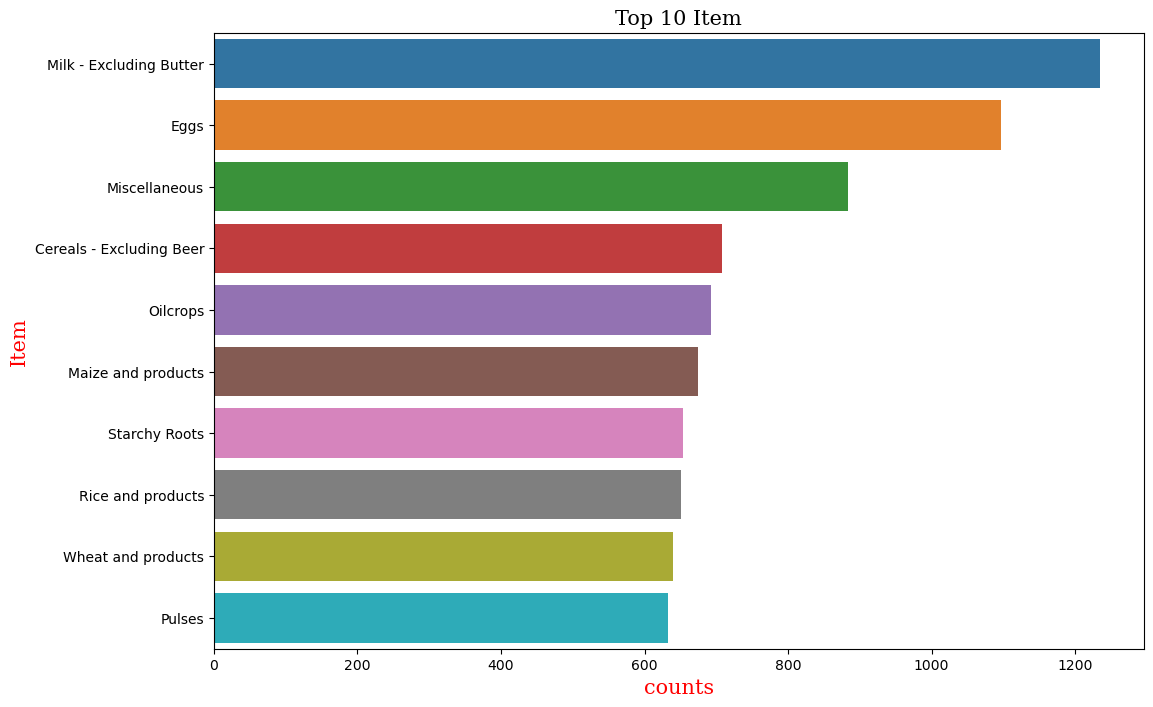

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_item.values, y=top_10_item.index)


font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}


plt.title('Top 10 Item', fontdict=font1)
plt.xlabel('counts', fontdict=font2)
plt.ylabel('Item', fontdict=font2)
plt.show()

In [23]:
element_count = df['Element'].value_counts()
print(element_count)

Domestic supply quantity                  5213
Fat supply quantity (g/capita/day)        4928
Protein supply quantity (g/capita/day)    4925
Food supply (kcal/capita/day)             4905
Food                                      4866
Food supply quantity (kg/capita/yr)       4830
Import Quantity                           4652
Residuals                                 4573
Stock Variation                           4215
Production                                3805
Export Quantity                           2914
Losses                                    2008
Processing                                1978
Other uses (non-food)                     1525
Feed                                      1089
Seed                                       758
Tourist consumption                        555
Total Population - Both sexes               45
Name: Element, dtype: int64


In [24]:
top_5_element = element_count[:5]

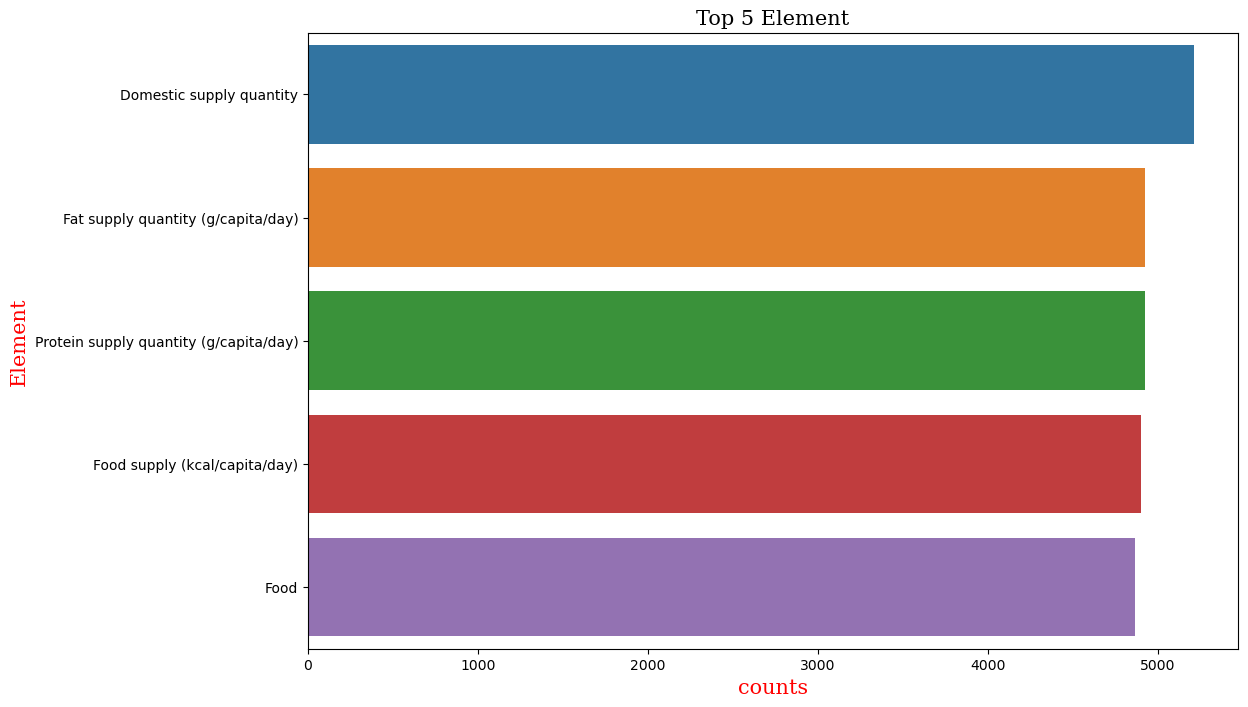

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_element.values, y=top_5_element.index)


font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}


plt.title('Top 5 Element', fontdict=font1)
plt.xlabel('counts', fontdict=font2)
plt.ylabel('Element', fontdict=font2)
plt.show()

In [26]:
df['Unit'].value_counts()

1000 tonnes        38151
g/capita/day        9853
kcal/capita/day     4905
kg                  4830
1000 persons          45
Name: Unit, dtype: int64

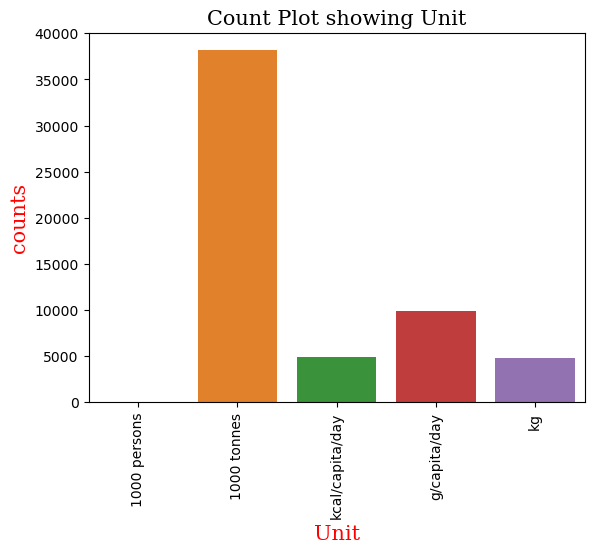

In [27]:
sns.countplot(x = 'Unit',data= df)

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.title('Count Plot showing Unit', fontdict=font1)
plt.xlabel('Unit', fontdict=font2)
plt.ylabel('counts', fontdict=font2)

plt.xticks(rotation = 90)

plt.show()

### What is the Total number of unique countries in the dataset?

In [28]:
unique_countries_count = df['Area'].nunique()
print(f'Total number of unique countries in the dataset: {unique_countries_count}')

Total number of unique countries in the dataset: 49


### Which of these Area had the highest sum in 2017

In [29]:
#Selecting columns 'Y2017' and 'Area' 
selected_columns = df[['Y2017', 'Area']] 

In [30]:
#Performing a groupby operation on 'Area'
grouped_data = selected_columns.groupby('Area')['Y2017'].sum().reset_index()

max_area = grouped_data.loc[grouped_data['Y2017'].idxmax()]

In [31]:
print(f"Area with the highest sum in 2017: {max_area['Area']}")
print(f"Sum in 2017: {max_area['Y2017']}")

Area with the highest sum in 2017: Nigeria
Sum in 2017: 1483106.23


### What is the total number of the sum of Processing in 2017?

In [32]:
# Group by 'Element' column and sum the 'Y2017' values for 'Processing' element
processing_2017_sum = df[df['Element'] == 'Processing'].groupby('Element')['Y2017'].sum().reset_index()

# Print the total sum of processing in 2017
print("Total sum of processing in 2017:")
print(processing_2017_sum)

Total sum of processing in 2017:
      Element     Y2017
0  Processing  292826.0


### Which of these Areas  had the 7th lowest sum in 2017

In [33]:
# Select columns Y2017 and Area
selected_columns = df[['Y2017', 'Area']]

# Group by 'Area' and calculate the sum for 'Y2017'
grouped_data = selected_columns.groupby('Area')['Y2017'].sum().reset_index()

# Sort the data by the sum in ascending order
sorted_data = grouped_data.sort_values(by='Y2017', ascending=True)

# Find the 7th lowest sum and the corresponding area
seventh_lowest_sum = sorted_data.iloc[6]['Y2017']
seventh_lowest_area = sorted_data.iloc[6]['Area']

print("7th Lowest Sum in 2017:", seventh_lowest_sum)
print("Area with 7th Lowest Sum in 2017:", seventh_lowest_area)

7th Lowest Sum in 2017: 19095.16
Area with 7th Lowest Sum in 2017: Guinea-Bissau


### What year has the highest sum of Stock Variation?

In [34]:
# Group by 'Element' column and sum the stock variation for each year
stock_variation_by_year = df[df['Element'] == 'Stock Variation'].groupby('Element')[['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].sum()

# Finding the year with the highest sum of stock variation
year_with_highest_stock_variation = stock_variation_by_year.idxmax(axis=1).values[0]

# Get the highest sum of stock variation
highest_stock_variation_sum = stock_variation_by_year.max(axis=1).values[0]

# Print the result
print(f"The year with the highest sum of stock variation is {year_with_highest_stock_variation} with a total sum of {highest_stock_variation_sum}.")

The year with the highest sum of stock variation is Y2014 with a total sum of 58752.83.


### What is the total Protein supply quantity in Madagascar in 2015?

In [35]:
madagascar_2015_protein = df[(df['Area'] == 'Madagascar') & (df['Element'] == 'Protein supply quantity (g/capita/day)')]['Y2015'].sum()

# Print the result
print(f"Total protein supply quantity in Madagascar in 2015: {madagascar_2015_protein} grams per capita per day")

Total protein supply quantity in Madagascar in 2015: 173.04999999999998 grams per capita per day


### Which year had the least correlation with Element Code

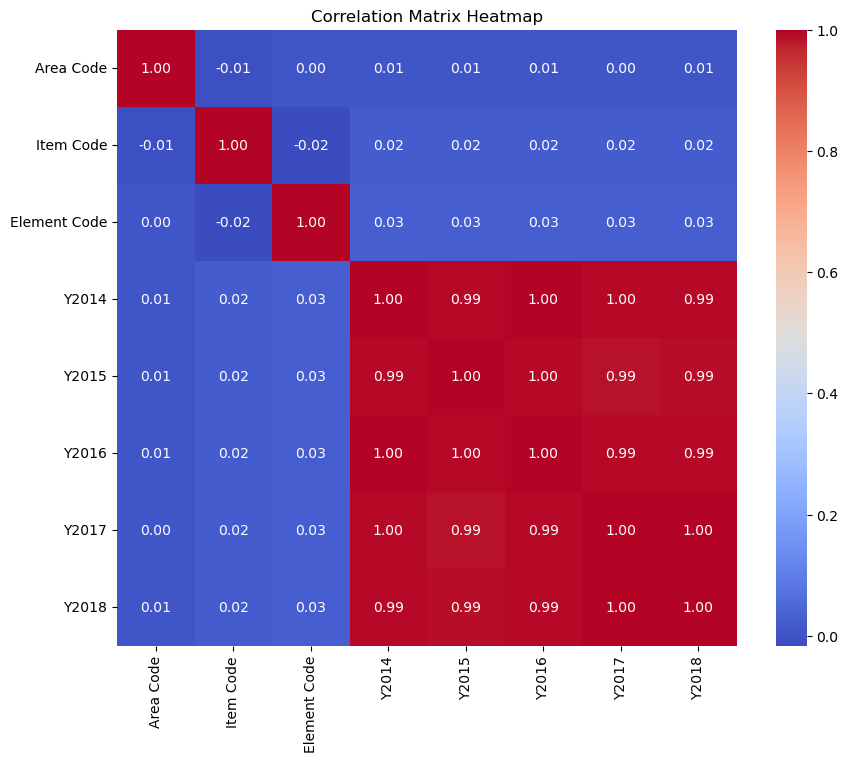

In [36]:
correlation_matrix = df.corr(numeric_only=True)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
relevant_columns = ['Element Code', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']
data_subset = df[relevant_columns]

# Calculate correlations between "Element code" and each year
correlations = data_subset.corr().loc['Element Code'][1:]

# Find the year with the least correlation
year_with_least_correlation = correlations.idxmin()
least_correlation_value = correlations.min()

# Print the result
print(f"The year with the least correlation with 'Element code' is {year_with_least_correlation} with a correlation of {least_correlation_value}.")


The year with the least correlation with 'Element code' is Y2016 with a correlation of 0.02508037233830874.


### What is the total sum of Wine produced in 2015 and 2018?

In [38]:
# Select columns 'Item', 'Y2015', and 'Y2018'
selected_columns = df[['Item', 'Y2015', 'Y2018']]

# Group by 'Item' and calculate the sum for 'Y2015' and 'Y2018'
wine_production_sum = selected_columns.groupby('Item').agg({'Y2015': 'sum', 'Y2018': 'sum'})

# Extract the sum for wine produced in 2015 and 2018
sum_wine_2015 = wine_production_sum['Y2015']['Wine']
sum_wine_2018 = wine_production_sum['Y2018']['Wine']

print("Total Wine Produced in 2015:", sum_wine_2015)
print("Total Wine Produced in 2018:", sum_wine_2018)

Total Wine Produced in 2015: 4250.81
Total Wine Produced in 2018: 4035.32
